In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [184]:
df=pd.read_csv('hw.csv')

In [185]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [186]:
df=df.drop(['Gender'],axis=1)

In [187]:
cols = df.columns.tolist()
Weight = cols.index('Weight')

# Swap the columns
cols[0], cols[Weight] = cols[Weight], cols[0]
df = df[cols]

print(df)

          Weight     Height
0     241.893563  73.847017
1     162.310473  68.781904
2     212.740856  74.110105
3     220.042470  71.730978
4     206.349801  69.881796
...          ...        ...
9995  136.777454  66.172652
9996  170.867906  67.067155
9997  128.475319  63.867992
9998  163.852461  69.034243
9999  113.649103  61.944246

[10000 rows x 2 columns]


Text(0, 0.5, 'Height')

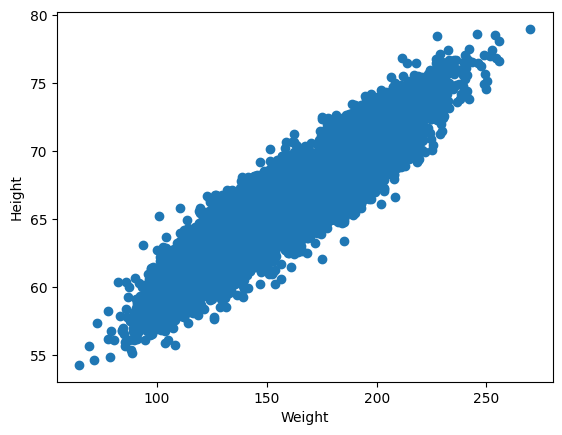

In [188]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')


In [189]:
##divide dataset into dependent nad independent feature
X=df[['Weight']]
y=df['Height']

In [190]:
y

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 1), (2000, 1), (8000,), (2000,))

In [193]:
##Standardize the data(as the values are bigger standardization reduces data in smaller values and gradient descnet can be easily achiev
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [194]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

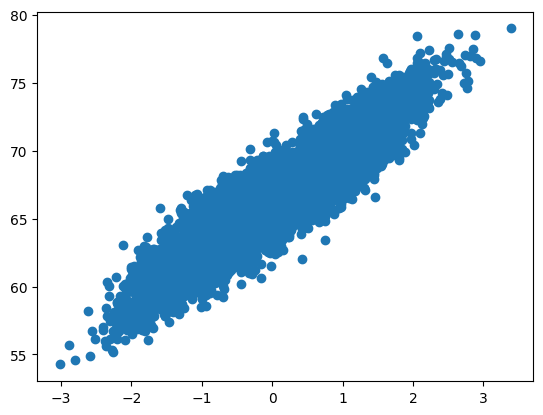

In [195]:
plt.scatter(X_train, y_train)

In [196]:
##Train model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)




LinearRegression()

In [197]:
print("The slope of weight is:", regressor.coef_)
print("The intercept of weight is:", regressor.intercept_)

The slope of weight is: [3.55479288]
The intercept of weight is: 66.3596814074891


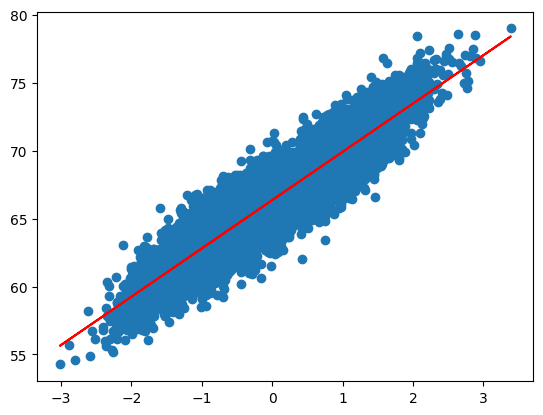

In [198]:
plt.scatter(X_train, y_train)
plt.plot(X_train,regressor.predict(X_train), color='red')

prediction of train data
1) pred ht=intr+coeff(X_train)



pred of test data
1)pred ht=intr+coeff(X_test)

In [199]:
y_pred_test=regressor.predict(X_test)
y_pred_test,y_test

(array([67.66759668, 70.11347651, 67.34604311, ..., 62.34937415,
        69.27157847, 59.829821  ], shape=(2000,)),
 6252    68.687232
 4684    68.829334
 1731    66.398128
 4742    71.929340
 4521    67.042903
           ...    
 6412    65.748601
 8285    60.731857
 7853    62.188933
 1095    67.068304
 6929    58.632720
 Name: Height, Length: 2000, dtype: float64)

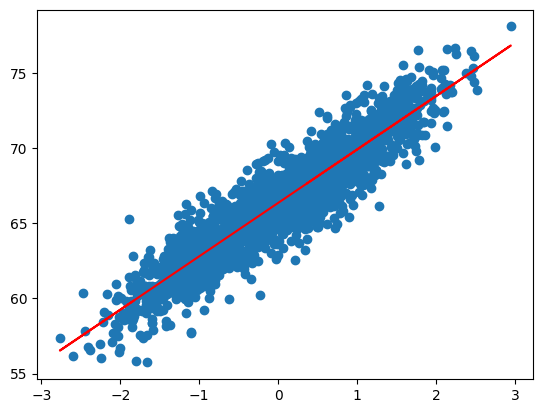

In [200]:
plt.scatter(X_test, y_test)  # Scatter plot of actual test data
plt.plot(X_test, regressor.predict(X_test), color='red')  # Plot of predicted values


In [201]:
##Performance metrics
 


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [202]:
mse=mean_squared_error(y_test, y_pred_test)
mae=mean_absolute_error(y_test, y_pred_test)
rmse=np.sqrt(mse)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 2.112361948474147
MAE: 1.1588656330992098
RMSE: 1.4533966934303062


In [203]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred_test)
score

0.8578120230894554

Adusted R square
adjusted r2=1-[(1-r2)*(n-1)/(n-k-1)]

In [204]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8577408579358465

In [205]:
regressor

LinearRegression()

In [206]:
scaled_weight=scaler.transform([[170]])
scaled_weight


c:\Users\Lenovo\Desktop\Python\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.27068721]])

In [208]:
print("The height prediction for 170kg if:",regressor.predict([scaled_weight[0]]))

The height prediction for 170kg if: [67.32191838]


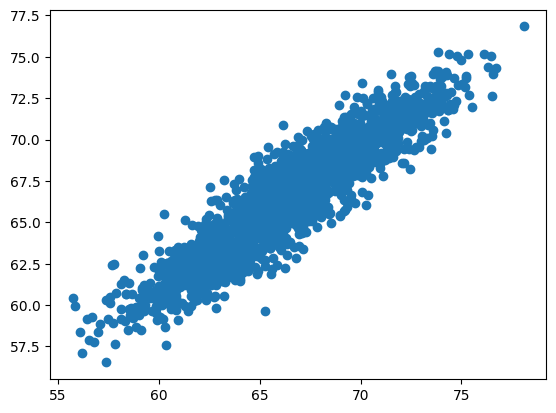

In [209]:
##Assumption 
plt.scatter(y_test, y_pred_test)

In [210]:
residuals=y_test-y_pred_test
residuals

6252    1.019636
4684   -1.284143
1731   -0.947915
4742   -0.390533
4521   -1.690374
          ...   
6412    1.525611
8285   -1.039337
7853   -0.160441
1095   -2.203274
6929   -1.197101
Name: Height, Length: 2000, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7404\1503200372.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde="True")


<Axes: xlabel='Height', ylabel='Density'>

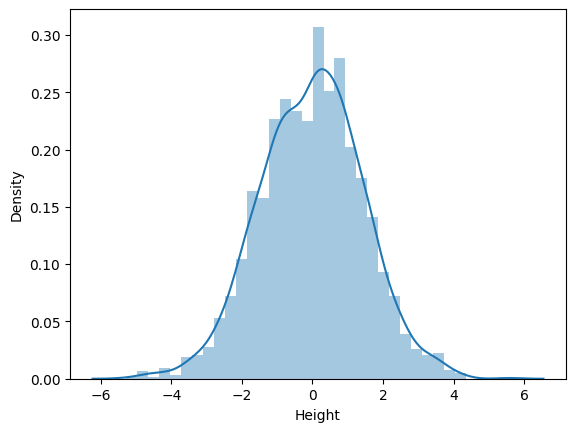

In [213]:
import seaborn as sns
sns.distplot(residuals, kde="True")